In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split , cross_val_score ,RandomizedSearchCV
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Step 1 - Data Importing

In [49]:
df = pd.read_csv(r"/Users/pvsairamsaketh/Desktop/projects/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [50]:
#checking our dependant column
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# step2 - basic data inspection

In [51]:

df.head() #to print topp 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
df.tail()#to print bottom 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [53]:
df.sample(5) #to print random 5 sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
222,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
816,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
649,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
933,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
178,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0


In [54]:
#to check datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [55]:
#to check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [56]:
#to check mathematical information of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [57]:
df.shape

(1025, 14)

# Step 3 - Data Cleaning

In [58]:
#to check null values or not
df.isnull().sum() #no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
#Rename column names
df = df.rename(columns={'cp':'ChestPainType','trestbps':'RestingBloodPressure','chol':'Cholestrol','fbs':'FastingBloodSugar','restecg':'RestingEcg','thalach':'MaxHeartRate','exang':'Exercise','ca':'NoOfBloodVesselsDuringFluroscopy','thal':'Thalassemia'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               1025 non-null   int64  
 1   sex                               1025 non-null   int64  
 2   ChestPainType                     1025 non-null   int64  
 3   RestingBloodPressure              1025 non-null   int64  
 4   Cholestrol                        1025 non-null   int64  
 5   FastingBloodSugar                 1025 non-null   int64  
 6   RestingEcg                        1025 non-null   int64  
 7   MaxHeartRate                      1025 non-null   int64  
 8   Exercise                          1025 non-null   int64  
 9   oldpeak                           1025 non-null   float64
 10  slope                             1025 non-null   int64  
 11  NoOfBloodVesselsDuringFluroscopy  1025 non-null   int64  
 12  Thalas

# Step 4 - Data Analysis and Data Visualization 

In [60]:
#grouping chestpaintype , target
df1 = df.groupby('ChestPainType').agg({'target':'count'})

In [61]:
df1 #from this we can say out of 1025 records we have , 497 people got chestpain type 0

,target
ChestPainType,
0,497
1,167
2,284
3,77


In [62]:
#grouping Thalassemia with Target 
# Grouping Thalassemia with Target and adding percentage
df2 = (
    df.groupby(['Thalassemia', 'ChestPainType', 'NoOfBloodVesselsDuringFluroscopy'])
      .agg(Count_of_Patients=('target', 'count'))
      .reset_index()
)

# Add percentage column
df2['Percentage'] = (df2['Count_of_Patients'] / df2['Count_of_Patients'].sum() * 100).round(1)

# Sort by Count_of_Patients descending
df2 = df2.sort_values(by=['Count_of_Patients', 'Thalassemia', 'ChestPainType', 'NoOfBloodVesselsDuringFluroscopy'], 
                      ascending=False)





In [63]:

df2 # Most heart disease cases occur in patients with Thalassemia 2 or 3, chest pain type 2 or 3, and 0–2 major vessels. Higher Thal 3 with more vessels is less frequent but high-risk.


,Thalassemia,ChestPainType,NoOfBloodVesselsDuringFluroscopy,Count_of_Patients,Percentage
17,2,2,0,146,14.2
10,2,0,0,103,10.0
14,2,1,0,98,9.6
25,3,0,0,94,9.2
26,3,0,1,79,7.7
27,3,0,2,69,6.7
11,2,0,1,37,3.6
33,3,2,0,33,3.2
18,2,2,1,32,3.1
28,3,0,3,31,3.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               1025 non-null   int64  
 1   sex                               1025 non-null   int64  
 2   ChestPainType                     1025 non-null   int64  
 3   RestingBloodPressure              1025 non-null   int64  
 4   Cholestrol                        1025 non-null   int64  
 5   FastingBloodSugar                 1025 non-null   int64  
 6   RestingEcg                        1025 non-null   int64  
 7   MaxHeartRate                      1025 non-null   int64  
 8   Exercise                          1025 non-null   int64  
 9   oldpeak                           1025 non-null   float64
 10  slope                             1025 non-null   int64  
 11  NoOfBloodVesselsDuringFluroscopy  1025 non-null   int64  
 12  Thalas

In [65]:
import warnings
warnings.filterwarnings('ignore')

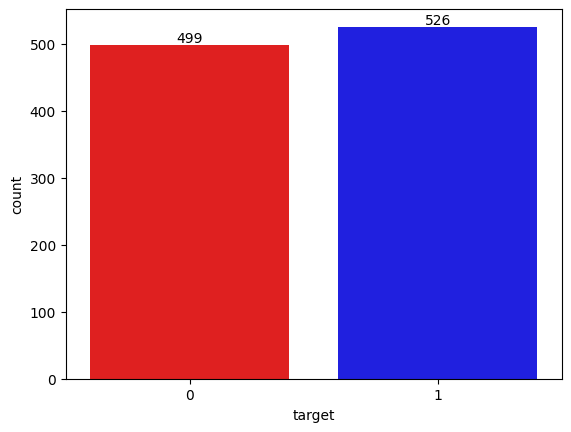

In [66]:
#to check target col count
a = sns.countplot(x = 'target',data = df , palette = ['red','blue'])
for ax in a.containers:
    a.bar_label(ax)


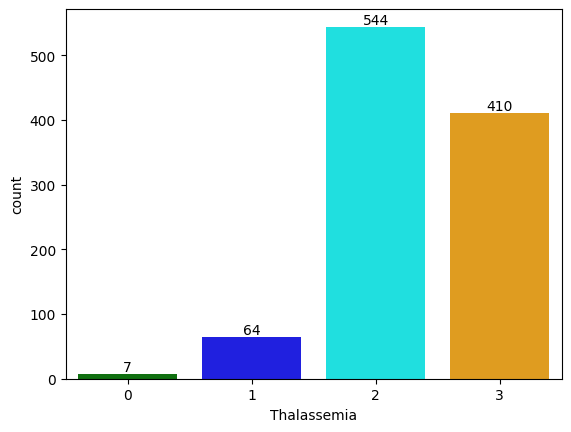

In [67]:
#to check Thalassemia count
a = sns.countplot(x = 'Thalassemia',data = df , palette = ['green','blue','cyan','orange'])
for ax in a.containers:
    a.bar_label(ax)

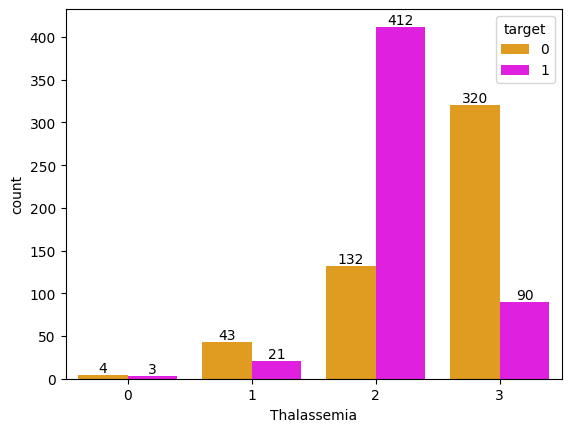

In [68]:
# to check thallasmia with target as hue
a = sns.countplot(x = 'Thalassemia',data = df ,hue = 'target',palette = ['orange','magenta'])
for ax in a.containers:
    a.bar_label(ax) #majority of them got thallasmia 2 and are prone to heart disease

In [69]:
df.columns

Index(['age', 'sex', 'ChestPainType', 'RestingBloodPressure', 'Cholestrol',
       'FastingBloodSugar', 'RestingEcg', 'MaxHeartRate', 'Exercise',
       'oldpeak', 'slope', 'NoOfBloodVesselsDuringFluroscopy', 'Thalassemia',
       'target'],
      dtype='object')

In [70]:
df.head()

,age,sex,ChestPainType,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingEcg,MaxHeartRate,Exercise,oldpeak,slope,NoOfBloodVesselsDuringFluroscopy,Thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [71]:
df['Thalassemia'].value_counts()

Thalassemia
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [72]:
df['NoOfBloodVesselsDuringFluroscopy'].value_counts()

NoOfBloodVesselsDuringFluroscopy
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

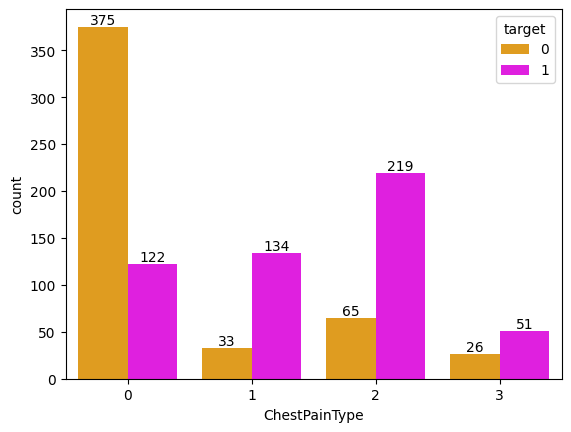

In [73]:
#chest pain type with target
a = sns.countplot(x = 'ChestPainType',data = df ,hue = 'target',palette = ['orange','magenta'])
for ax in a.containers:
    a.bar_label(ax)#people who got chesspaintype 0 , majority of them didnt got heart disease but people who got chesspaintype 2 are more prone to heart disease 

# Step 5 - Outlier Detection

<Axes: >

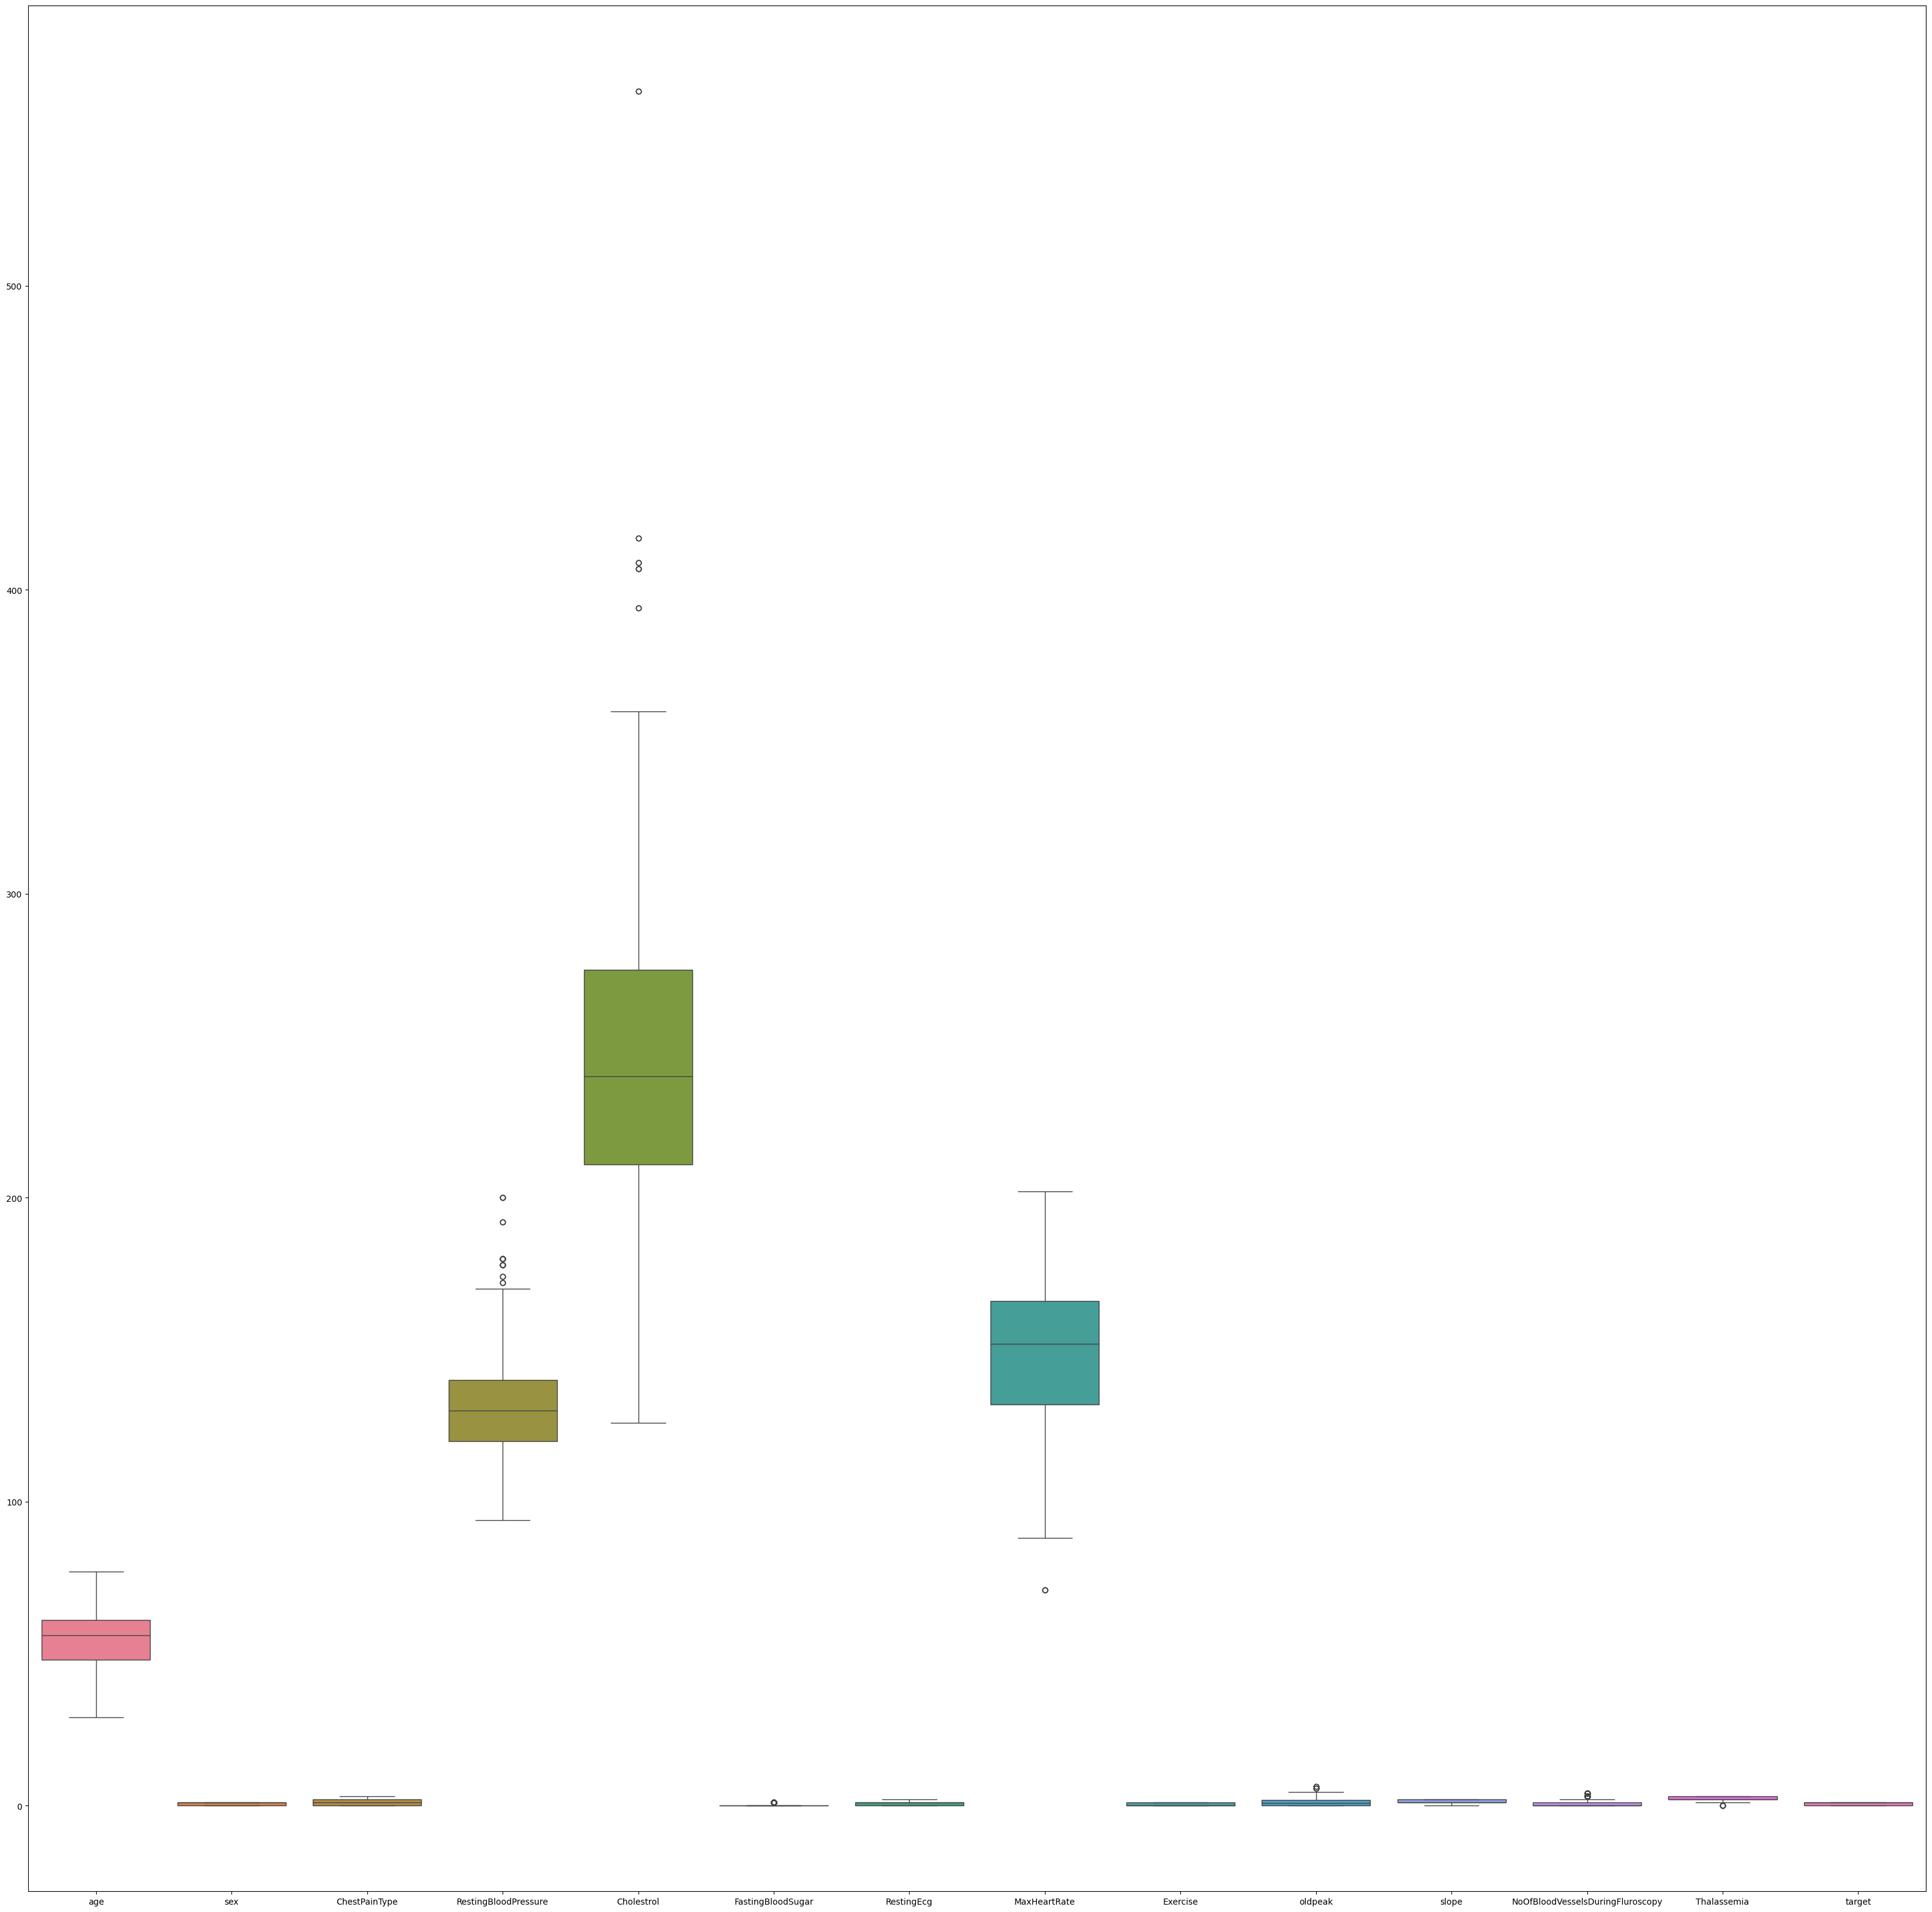

In [74]:
#to find any outliers in dataset
plt.figure(figsize=(40,40))
sns.boxplot(df)

In [75]:
#outliers are present in RestingBloodPressure , Cholestrol , FastingBloodSugar,MaxHeartRate,oldpeak , NoOfBloodvesselsDuringFlurpscopy , Thallasmia
# Columns with outliers
num_cols = ['RestingBloodPressure', 'Cholestrol', 'MaxHeartRate', 'oldpeak']
cat_ord_cols = ['FastingBloodSugar', 'NoOfBloodVesselsDuringFluroscopy', 'Thalassemia']

In [76]:
#to solve the outliers

#for numerical columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
#for categorical columns

# Example: FastingBloodSugar (0 or 1)
df['FastingBloodSugar'] = df['FastingBloodSugar'].clip(0, 1)

# Number of vessels (0–4)
df['NoOfBloodVesselsDuringFluroscopy'] = df['NoOfBloodVesselsDuringFluroscopy'].clip(0, 4)

# Thalassemia (0–3)
df['Thalassemia'] = df['Thalassemia'].clip(0, 3)

<Axes: >

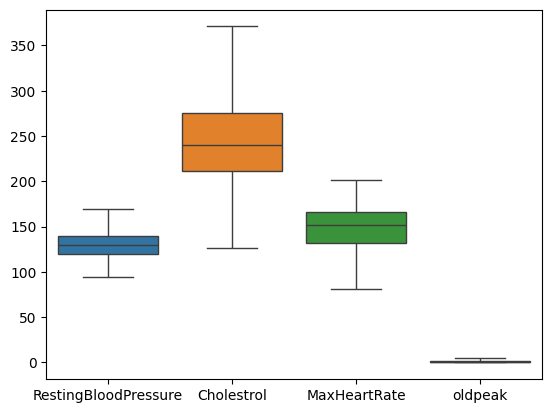

In [77]:
sns.boxplot(data=df[num_cols]) #outliers removed successfully

In [78]:
df.head()

,age,sex,ChestPainType,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingEcg,MaxHeartRate,Exercise,oldpeak,slope,NoOfBloodVesselsDuringFluroscopy,Thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [79]:
df['oldpeak'] = df['oldpeak'].astype('int64')
df['oldpeak'].head()

0    1
1    3
2    2
3    0
4    1
Name: oldpeak, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   age                               1025 non-null   int64
 1   sex                               1025 non-null   int64
 2   ChestPainType                     1025 non-null   int64
 3   RestingBloodPressure              1025 non-null   int64
 4   Cholestrol                        1025 non-null   int64
 5   FastingBloodSugar                 1025 non-null   int64
 6   RestingEcg                        1025 non-null   int64
 7   MaxHeartRate                      1025 non-null   int64
 8   Exercise                          1025 non-null   int64
 9   oldpeak                           1025 non-null   int64
 10  slope                             1025 non-null   int64
 11  NoOfBloodVesselsDuringFluroscopy  1025 non-null   int64
 12  Thalassemia                       

# Step 6 - Model Building

In [81]:
#splitting dataset into Dependant and Independant columns
X = df.drop('target',axis = 1)
y = df['target']

In [82]:
#split dataset into 20 % test and 80% train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2 , random_state=42)

In [83]:
len(X_train)

820

In [84]:
len(X_test)

205

In [85]:
#standard scaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
#perform models 

models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]
results = {}

Model: LogisticRegression
Training Accuracy: 0.8634
Test Accuracy: 0.7951
⚠️ Possible Overfitting detected!
Confusion Matrix:
[[73 29]
 [13 90]]


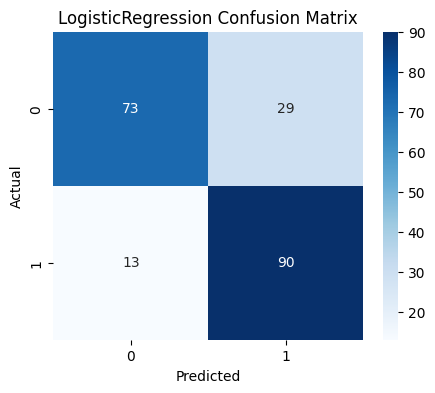

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Model: DecisionTreeClassifier
Training Accuracy: 1.0000
Test Accuracy: 0.9854
✅ Model seems balanced.
Confusion Matrix:
[[102   0]
 [  3 100]]


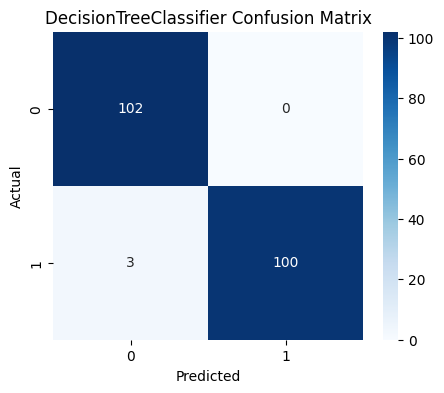

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Model: RandomForestClassifier
Training Accuracy: 1.0000
Test Accuracy: 0.9854
✅ Model seems balanced.
Confusion Matrix:
[[102   0]
 [  3 100]]


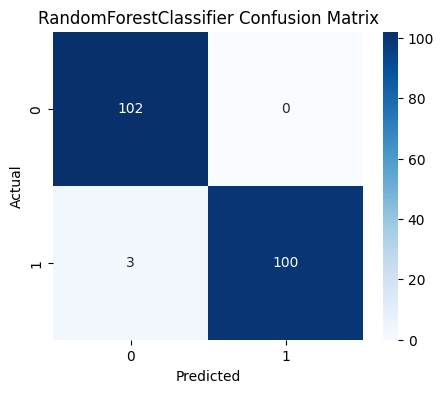

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Model: SVC
Training Accuracy: 0.9549
Test Accuracy: 0.8878
⚠️ Possible Overfitting detected!
Confusion Matrix:
[[85 17]
 [ 6 97]]


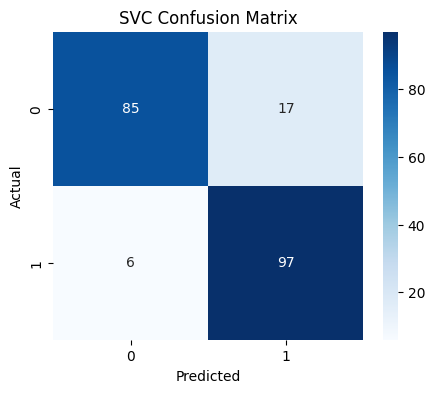

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Model: KNeighborsClassifier
Training Accuracy: 0.9439
Test Accuracy: 0.8195
⚠️ Possible Overfitting detected!
Confusion Matrix:
[[76 26]
 [11 92]]


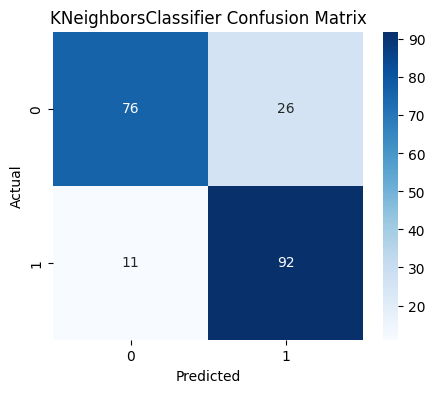

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Model: GaussianNB
Training Accuracy: 0.8512
Test Accuracy: 0.7902
⚠️ Possible Overfitting detected!
Confusion Matrix:
[[72 30]
 [13 90]]


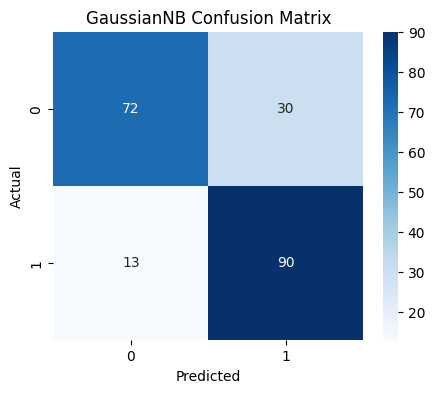

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       102
           1       0.75      0.87      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205

----------------------------------------------------------------------------------------------------------------------------------------------------------------


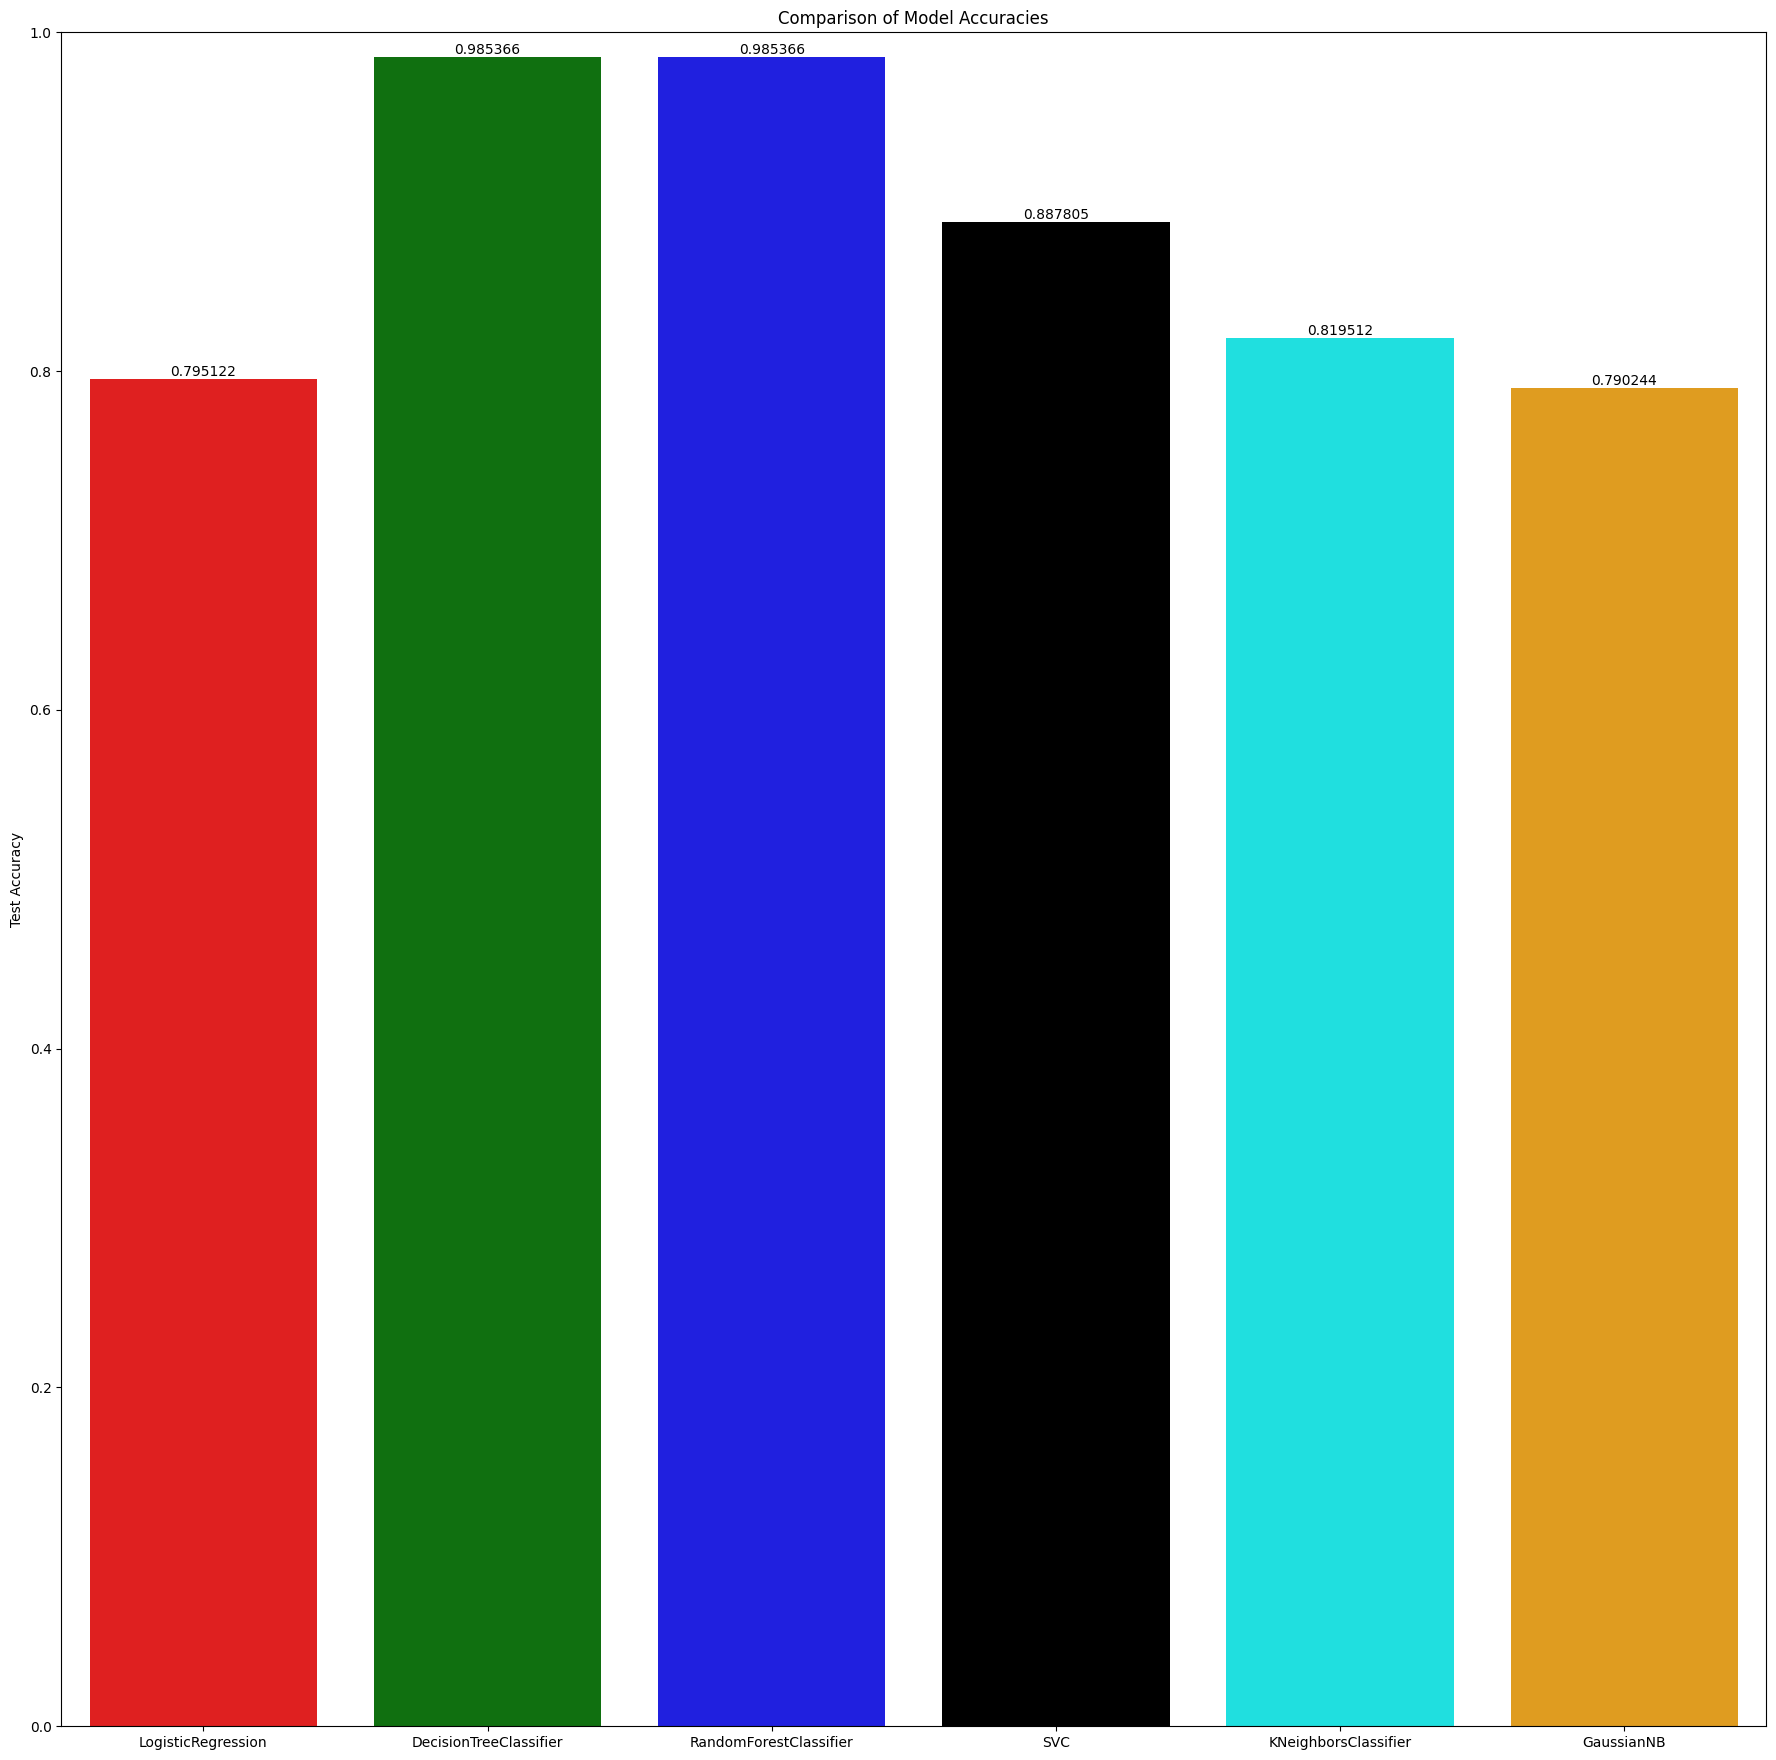

In [87]:
# Loop through models
for model in models:
    print(f"Model: {model.__class__.__name__}")
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results[model.__class__.__name__] = test_score
    
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    
    # Overfitting check
    if train_score > test_score + 0.05:
        print("⚠️ Possible Overfitting detected!")
    elif test_score > train_score + 0.05:
        print("⚠️ Possible Underfitting detected!")
    else:
        print("✅ Model seems balanced.")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Optional: visualize confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*160)

# Optional: Compare model accuracies
plt.figure(figsize=(22,22))
#models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]
a = sns.barplot(x=list(results.keys()), y=list(results.values()),palette = ['red','green','blue','black','cyan','orange'])
for ax in a.containers:
    a.bar_label(ax)
plt.ylabel("Test Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0,1)
plt.show()
    

# step 7 - Model Optimization Remove overfitting 

In [88]:
#define hyperparameters
# step 1 - Models defining
models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [89]:
#step 2 - defining hyperparameters
param_distributions = {
    'LogisticRegression': {
        'C': [0.1, 0.5, 1, 2],
        'penalty': ['l2','l1'],
        'solver': ['lbfgs', 'liblinear']
    },
    'SVC': {
        'C': [0.1, 0.5, 1, 2, 5],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    },
    'KNeighborsClassifier': {
        'n_neighbors': list(range(5,16)),
        'weights': ['distance'],
        'p': [1,2]
    },
    'GaussianNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    },
    'DecisionTreeClassifier': {
        'max_depth': list(range(3,9)),
        'min_samples_split': list(range(2,9)),
        'min_samples_leaf': list(range(1,5))
    },
    'RandomForestClassifier': {
        'n_estimators': list(range(50,151,10)),
        'max_depth': list(range(3,11)),
        'min_samples_split': list(range(2,9)),
        'min_samples_leaf': list(range(1,5))
    }
}

In [90]:
# step 3 -  Dictionary to store test accuracies
results = {}

🔹 Tuning LogisticRegression...
Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}
Training Accuracy: 0.8659
Test Accuracy: 0.8000
⚠️ Possible Overfitting detected!


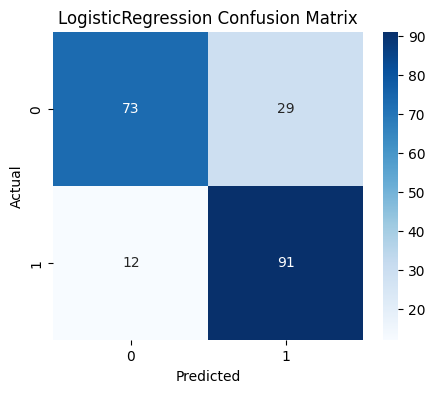

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       102
           1       0.76      0.88      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

------------------------------------------------------------
🔹 Tuning SVC...
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 5}
Training Accuracy: 0.9915
Test Accuracy: 0.9610
✅ Model seems balanced.


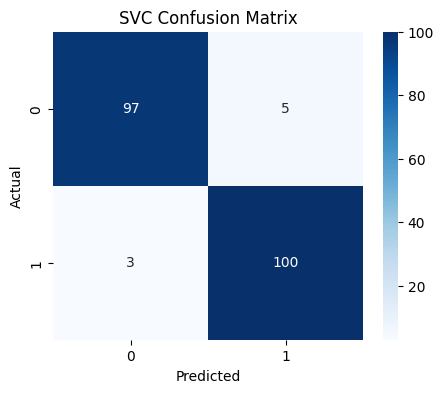

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       102
           1       0.95      0.97      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

------------------------------------------------------------
🔹 Tuning KNeighborsClassifier...
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 10}
Training Accuracy: 1.0000
Test Accuracy: 1.0000
✅ Model seems balanced.


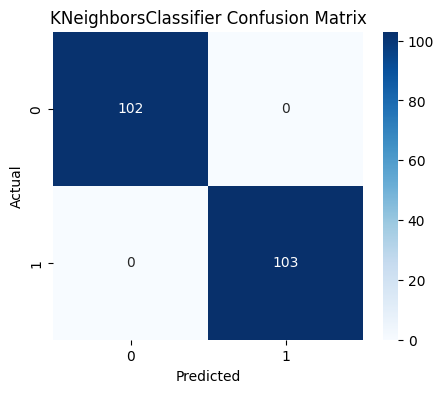

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

------------------------------------------------------------
🔹 Tuning GaussianNB...
Best Parameters: {'var_smoothing': 1e-09}
Training Accuracy: 0.8512
Test Accuracy: 0.7902
⚠️ Possible Overfitting detected!


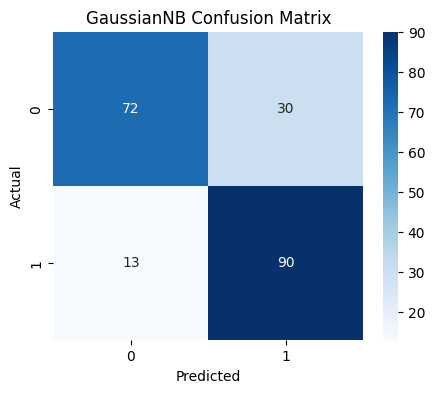

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       102
           1       0.75      0.87      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205

------------------------------------------------------------
🔹 Tuning DecisionTreeClassifier...
Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 8}
Training Accuracy: 0.9927
Test Accuracy: 0.9610
✅ Model seems balanced.


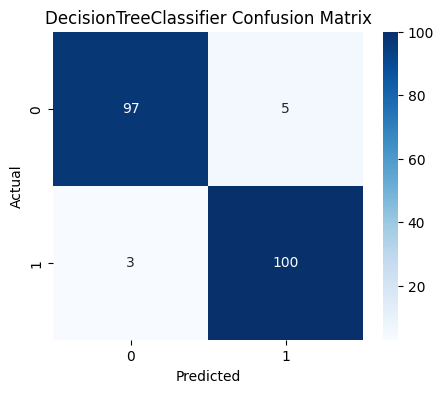

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       102
           1       0.95      0.97      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

------------------------------------------------------------
🔹 Tuning RandomForestClassifier...
Best Parameters: {'n_estimators': 130, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 10}
Training Accuracy: 1.0000
Test Accuracy: 0.9854
✅ Model seems balanced.


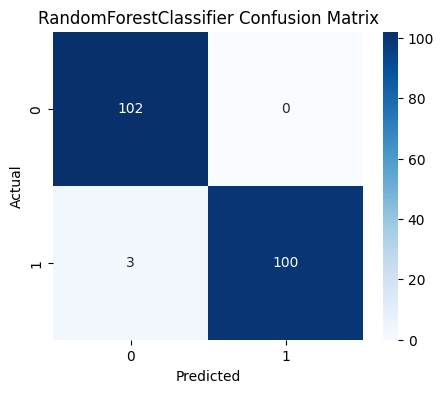

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

------------------------------------------------------------


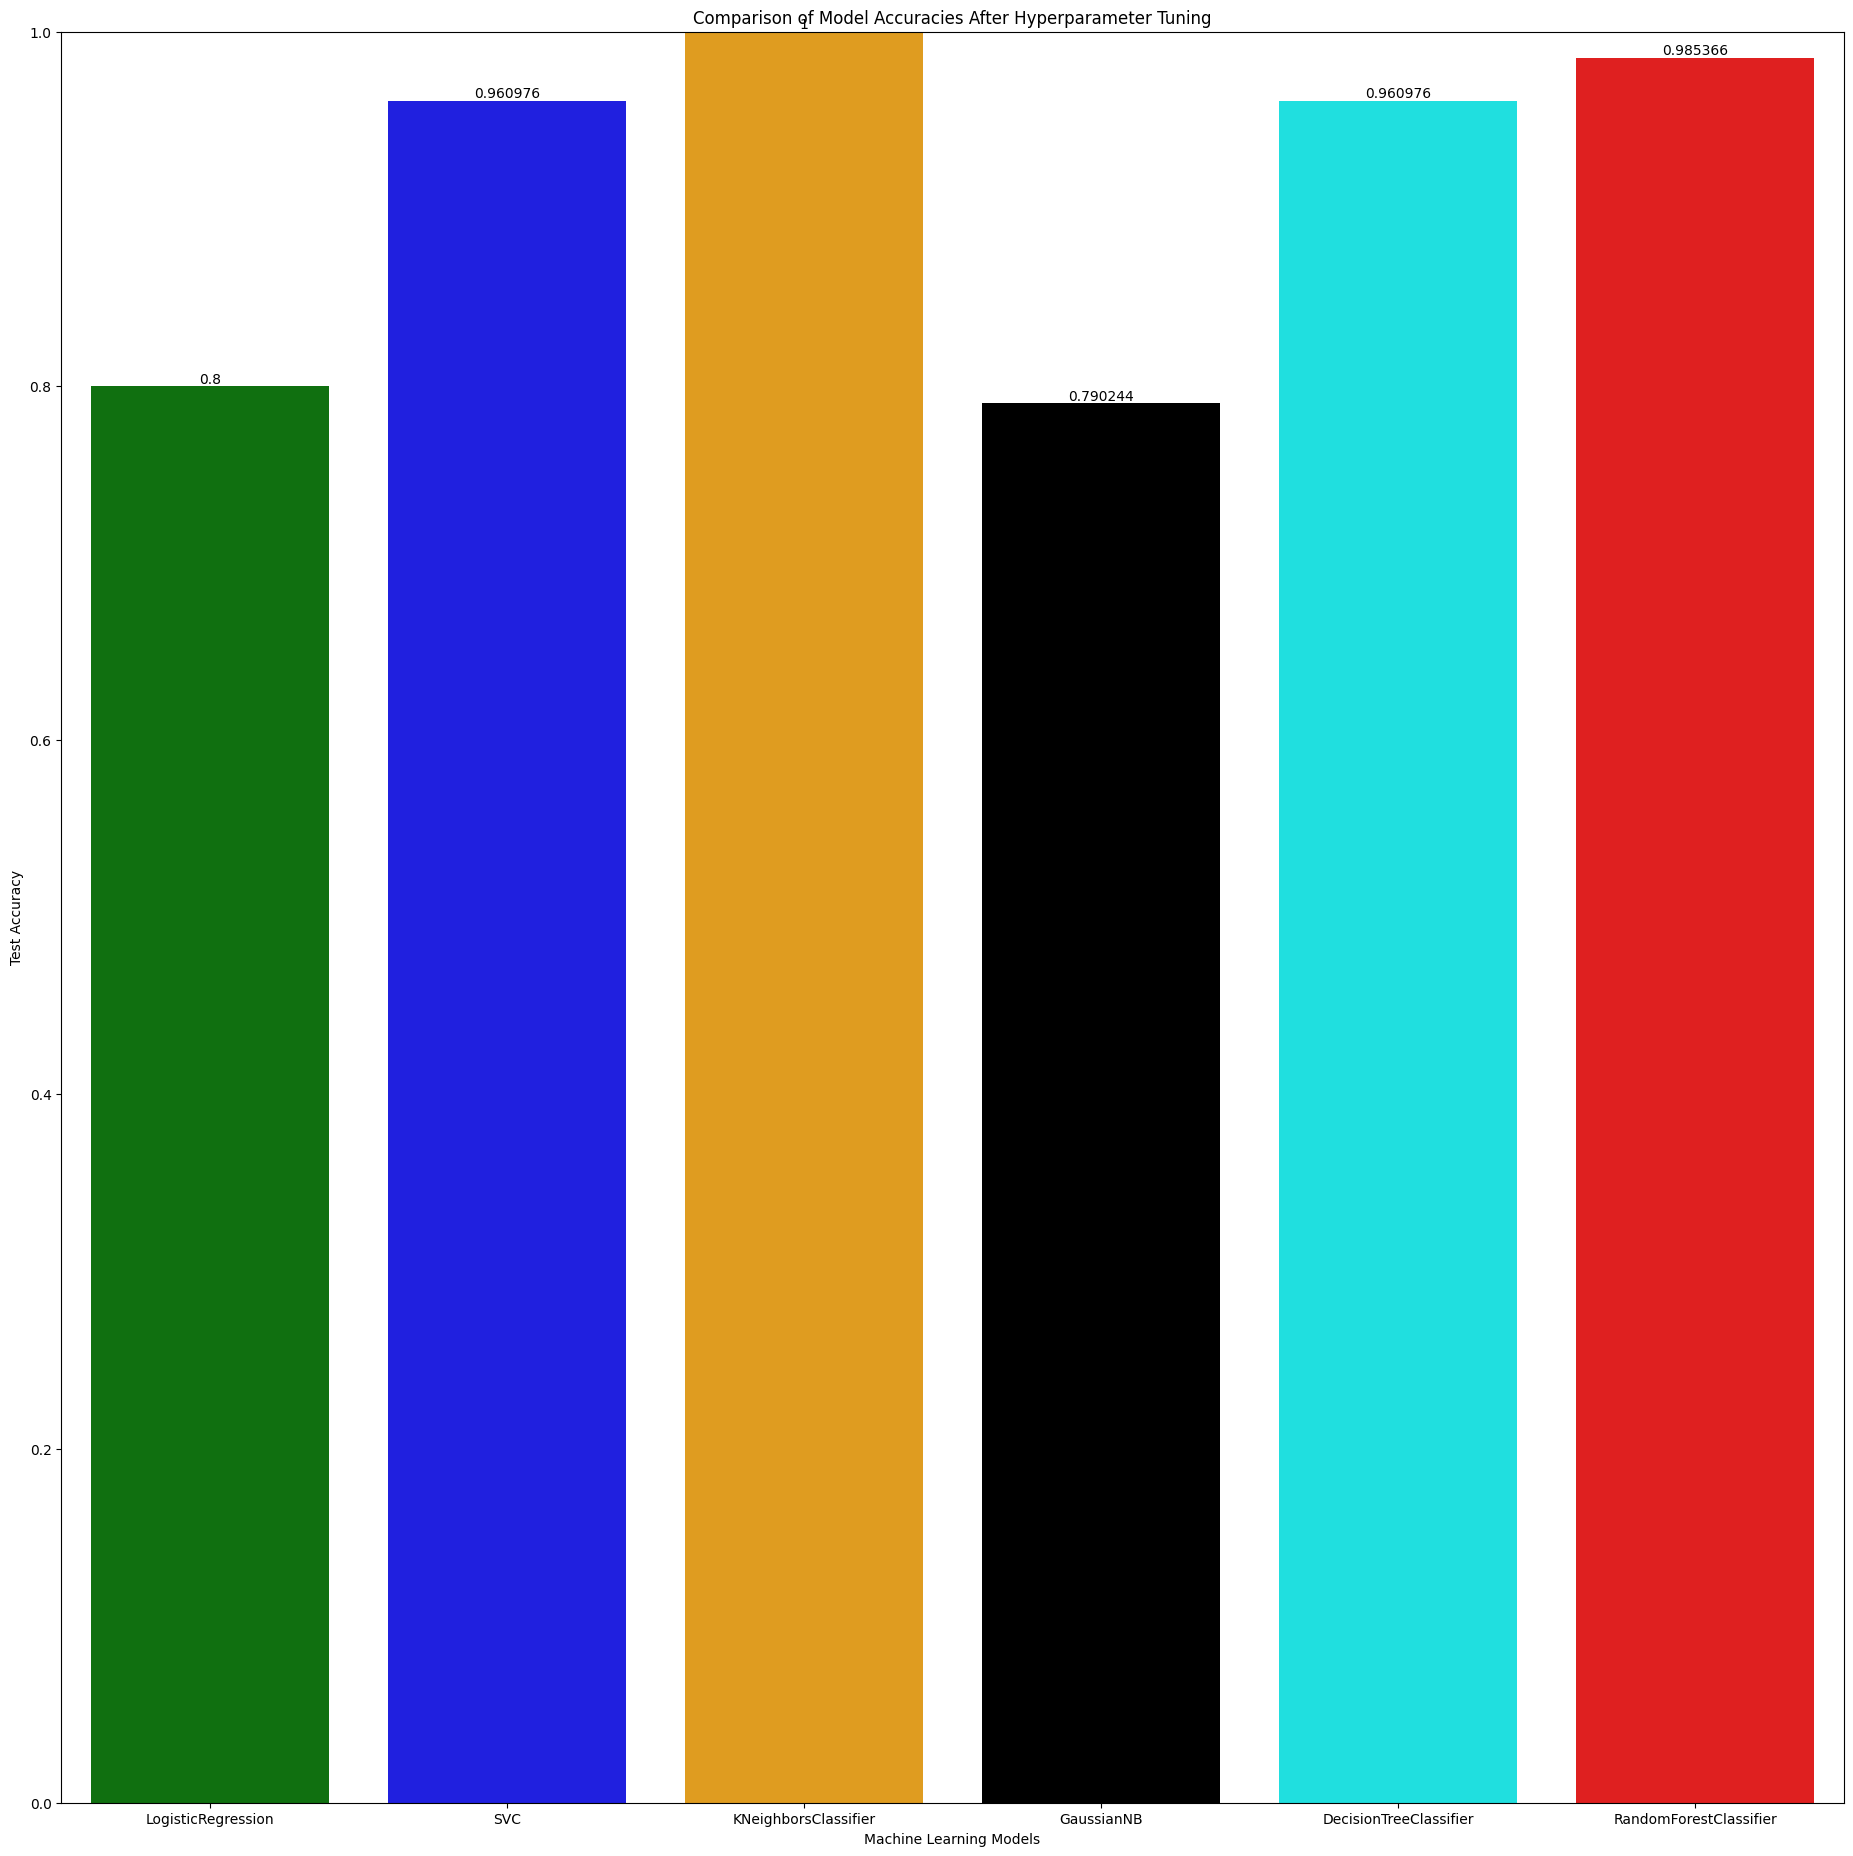

In [91]:
# step 4 - Hyperparameter tuning and evaluation loop
for name, model in models.items():
    print(f"🔹 Tuning {name}...")
    # step 5 - perform Randomised search and select best parameters
    rand_search = RandomizedSearchCV(estimator=model,param_distributions=param_distributions[name],n_iter=30,cv=15,scoring='accuracy',random_state=42,n_jobs=-1)
    rand_search.fit(X_train, y_train)
    best_model = rand_search.best_estimator_
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # step 6 - Accuracy
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    results[name] = test_score
    
    print(f"Best Parameters: {rand_search.best_params_}")
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    
    # step 7 - Overfitting check
    if train_score > test_score + 0.05:
        print("⚠️ Possible Overfitting detected!")
    else:
        print("✅ Model seems balanced.")
    
    # step 8 - Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*60)
# Compare model accuracies
plt.figure(figsize=(23,23))
a= sns.barplot(x=list(results.keys()), y=list(results.values()),palette = ['green','blue','orange','black','cyan','red'])
for ax in a.containers:
    a.bar_label(ax)
plt.xlabel("Machine Learning Models")
plt.ylabel("Test Accuracy")
plt.title("Comparison of Model Accuracies After Hyperparameter Tuning")
plt.ylim(0,1)
plt.show()

In [92]:
#knn is the best method - test it

# Best KNN model
best_knn = KNeighborsClassifier(weights='distance', p=1, n_neighbors=10)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Test Accuracy: 1.0
Confusion Matrix:
 [[102   0]
 [  0 103]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



# step 8 - Deep Learning model

# metrics types

| **Metric**                               | **Type**       | **Description / What It Measures**                               | **Use Case / Example**                                     |
| ---------------------------------------- | -------------- | ---------------------------------------------------------------- | ---------------------------------------------------------- |
| **`accuracy`**                           | Classification | Overall fraction of correctly predicted samples.                 | General classification tasks.                              |
| **`binary_accuracy`**                    | Classification | Accuracy for binary classification (0 or 1).                     | Binary output (e.g., disease yes/no).                      |
| **`categorical_accuracy`**               | Classification | Accuracy for multi-class with one-hot labels.                    | Multi-class (e.g., image classification).                  |
| **`sparse_categorical_accuracy`**        | Classification | Accuracy for multi-class with integer labels.                    | Multi-class (without one-hot encoding).                    |
| **`Precision`**                          | Classification | % of correct positive predictions among all predicted positives. | When false positives are costly (e.g., spam detection).    |
| **`Recall`**                             | Classification | % of actual positives correctly predicted.                       | When missing positives is costly (e.g., cancer detection). |
| **`F1-Score`**                           | Classification | Harmonic mean of precision and recall.                           | Balanced measure for imbalanced data.                      |
| **`AUC` (Area Under Curve)**             | Classification | Measures ability to distinguish between classes.                 | Evaluating model performance (ROC curve).                  |
| **`TruePositives`**                      | Classification | Number of correctly identified positive samples.                 | Model diagnostics.                                         |
| **`TrueNegatives`**                      | Classification | Number of correctly identified negatives.                        | Model diagnostics.                                         |
| **`FalsePositives`**                     | Classification | Incorrectly predicted positives.                                 | Helps understand model errors.                             |
| **`FalseNegatives`**                     | Classification | Missed positive cases.                                           | Important in medical or fraud detection.                   |
| **`MeanSquaredError (MSE)`**             | Regression     | Average squared difference between actual and predicted.         | Continuous outputs (e.g., price prediction).               |
| **`MeanAbsoluteError (MAE)`**            | Regression     | Average absolute difference between actual and predicted.        | Regression — less sensitive to outliers.                   |
| **`RootMeanSquaredError (RMSE)`**        | Regression     | Square root of MSE; penalizes large errors more.                 | Regression with emphasis on large errors.                  |
| **`R² (Coefficient of Determination)`**  | Regression     | Measures proportion of variance explained by model.              | Regression performance measure.                            |
| **`MeanAbsolutePercentageError (MAPE)`** | Regression     | Average % difference between prediction and actual value.        | Forecasting models.                                        |
| **`cosine_similarity`**                  | Similarity     | Measures similarity between two vectors (ranges -1 to 1).        | NLP, embeddings, recommendation systems.                   |
| **`log_cosh_error`**                     | Regression     | Smooth alternative to MSE; robust to outliers.                   | Regression tasks requiring smooth gradients.               |


# optimizer types - 

| **Optimizer**         | **Description**                                                                                  |
| --------------------- | ------------------------------------------------------------------------------------------------ |
| `SGD`                 | Stochastic Gradient Descent — updates weights using gradients; simple but may converge slowly.   |
| `SGD (with Momentum)` | Adds momentum to accelerate learning and avoid local minima.                                     |
| `Nesterov`            | A variant of momentum that looks ahead before updating parameters for faster convergence.        |
| `Adagrad`             | Adapts learning rates for each parameter; good for sparse data but learning rate decays quickly. |
| `RMSprop`             | Adapts learning rate using a moving average of squared gradients; good for non-stationary data.  |
| `Adam`                | Combines Momentum and RMSprop; most widely used optimizer in deep learning.                      |
| `Adamax`              | Variant of Adam using the infinity norm for better stability in some cases.                      |
| `Nadam`               | Adam + Nesterov Momentum; slightly faster convergence than Adam.                                 |
| `Ftrl`                | Useful for large-scale linear models; supports L1 and L2 regularization.                         |
| `Adadelta`            | Extension of Adagrad that reduces its aggressive, monotonically decreasing learning rate.        |
| `Lion`                | New optimizer that uses sign-based gradient updates for faster and more stable training.         |


# Loss types

| **Loss Function**                             | **Type**                | **Description**                                                                                | **When to Use / Example**                                                 |
| --------------------------------------------- | ----------------------- | ---------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| `binary_crossentropy`                         | Classification          | Measures the difference between two probability distributions for binary (0/1) classification. | Binary classification (e.g., heart disease prediction).                   |
| `categorical_crossentropy`                    | Classification          | Used for multi-class classification with one-hot encoded labels.                               | Multi-class classification (e.g., digit recognition with one-hot labels). |
| `sparse_categorical_crossentropy`             | Classification          | Same as above but for integer class labels (not one-hot).                                      | Multi-class classification with integer targets.                          |
| `mean_squared_error (MSE)`                    | Regression              | Measures average squared difference between actual and predicted values.                       | Regression tasks (e.g., predicting prices, continuous outputs).           |
| `mean_absolute_error (MAE)`                   | Regression              | Measures average absolute difference between actual and predicted values.                      | Regression, less sensitive to outliers than MSE.                          |
| `hinge`                                       | Classification          | Used for “maximum-margin” classification (like SVMs).                                          | Binary classification with {-1, +1} labels.                               |
| `squared_hinge`                               | Classification          | Square of hinge loss; penalizes larger margin violations more strongly.                        | Similar to hinge, but smoother gradients.                                 |
| `kullback_leibler_divergence (KL Divergence)` | Probabilistic Models    | Measures how one probability distribution diverges from another.                               | Variational autoencoders (VAEs), probabilistic models.                    |
| `poisson`                                     | Regression / Count Data | Suitable for modeling count data (e.g., event counts).                                         | When output represents count rates (e.g., number of calls, clicks).       |
| `cosine_similarity`                           | Similarity-Based        | Measures cosine similarity between predicted and true values.                                  | NLP, embeddings, or recommendation systems.                               |
| `huber`                                       | Regression              | Combination of MSE and MAE — less sensitive to outliers.                                       | Robust regression with outlier resistance.                                |
| `log_cosh`                                    | Regression              | Logarithm of hyperbolic cosine of prediction error; smooth alternative to MSE.                 | When you want smooth gradients and robustness.                            |
| `categorical_hinge`                           | Classification          | Hinge loss for multi-class problems.                                                           | Multi-class problems with {-1, +1} encoded labels.    

# Activation Functions

| **Activation Function**               | **Formula**                                   | **Range** | **Description**                                                | **When to Use**                                  |
| ------------------------------------- | --------------------------------------------- | --------- | -------------------------------------------------------------- | ------------------------------------------------ |
| **Sigmoid (σ)**                       | σ(x) = 1 / (1 + e^(-x))                       | (0, 1)    | Converts any real value into a probability-like output.        | Output layer for **binary classification**.      |
| **Tanh (Hyperbolic Tangent)**         | tanh(x) = (e^(x) - e^(-x)) / (e^(x) + e^(-x)) | (-1, 1)   | Zero-centered version of Sigmoid; stronger gradients.          | Hidden layers when inputs are **normalized**.    |
| **ReLU (Rectified Linear Unit)**      | ReLU(x) = max(0, x)                           | [0, ∞)    | Fast and efficient; avoids vanishing gradient problem.         | Default choice for **hidden layers**.            |
| **Leaky ReLU**                        | f(x) = x if x > 0 else 0.01x                  | (-∞, ∞)   | Solves “dead neuron” issue by allowing a small negative slope. | When some neurons die with ReLU.                 |
| **Parametric ReLU (PReLU)**           | f(x) = x if x > 0 else αx                     | (-∞, ∞)   | Learns the slope (α) automatically for better performance.     | Used in **deep CNNs**.                           |
| **ELU (Exponential Linear Unit)**     | f(x) = x if x > 0 else α*(e^x - 1)            | (-α, ∞)   | Helps achieve faster and more stable learning.                 | For **deep networks**.                           |
| **SELU (Scaled ELU)**                 | f(x) = λ * (x if x > 0 else α*(e^x - 1))      | (-∞, ∞)   | Self-normalizing activation, stabilizes training.              | When using **Self-Normalizing Neural Nets**.     |
| **Softmax**                           | f(xᵢ) = e^(xᵢ) / Σ e^(xⱼ)                     | (0, 1)    | Converts logits to probabilities across multiple classes.      | Output layer for **multi-class classification**. |
| **Swish**                             | f(x) = x * sigmoid(x)                         | (-∞, ∞)   | Smooth and non-monotonic; better than ReLU in deep models.     | For **deep neural networks**.                    |
| **GELU (Gaussian Error Linear Unit)** | f(x) = x * Φ(x)                               | (-∞, ∞)   | Used in Transformers; smooth like Swish.                       | **NLP models** (e.g., BERT, GPT).                |
| **Softplus**                          | f(x) = ln(1 + e^x)                            | (0, ∞)    | Smooth approximation of ReLU; differentiable everywhere.       | When smooth output is required.                  |
| **Hard Sigmoid**                      | f(x) = clip((x * 0.2) + 0.5, 0, 1)            | (0, 1)    | Fast, piecewise linear version of Sigmoid.                     | For **mobile/low-power models**.                 |
| **Hard Swish**                        | f(x) = x * ReLU6(x + 3) / 6                   | (-∞, ∞)   | Lightweight and efficient; used in MobileNetV3.                | For **mobile and embedded models**.              |


In [93]:
# Define ANN model
# ==========================
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Hidden layer 1
    Dense(32, activation='relu'),                               # Hidden layer 2
    Dense(16, activation='relu'),                               # Hidden layer 3
    Dense(1, activation='sigmoid')                              # Output layer for binary classification
])

In [94]:
# Compile the model
# Compile model
# ==========================
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy','binary_accuracy','recall'])

In [95]:
# Train the model
# ==========================
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=2  # One line per epoch
)

Epoch 1/100
41/41 - 1s - 21ms/step - accuracy: 0.7820 - binary_accuracy: 0.7820 - loss: 0.5543 - recall: 0.7626 - val_accuracy: 0.8171 - val_binary_accuracy: 0.8171 - val_loss: 0.4691 - val_recall: 0.8023
Epoch 2/100
41/41 - 0s - 1ms/step - accuracy: 0.8704 - binary_accuracy: 0.8704 - loss: 0.3601 - recall: 0.9050 - val_accuracy: 0.8232 - val_binary_accuracy: 0.8232 - val_loss: 0.4131 - val_recall: 0.8721
Epoch 3/100
41/41 - 0s - 1ms/step - accuracy: 0.8918 - binary_accuracy: 0.8918 - loss: 0.2867 - recall: 0.9318 - val_accuracy: 0.8110 - val_binary_accuracy: 0.8110 - val_loss: 0.4079 - val_recall: 0.8721
Epoch 4/100
41/41 - 0s - 1ms/step - accuracy: 0.9040 - binary_accuracy: 0.9040 - loss: 0.2531 - recall: 0.9318 - val_accuracy: 0.8659 - val_binary_accuracy: 0.8659 - val_loss: 0.3777 - val_recall: 0.8837
Epoch 5/100
41/41 - 0s - 971us/step - accuracy: 0.9177 - binary_accuracy: 0.9177 - loss: 0.2324 - recall: 0.9318 - val_accuracy: 0.8232 - val_binary_accuracy: 0.8232 - val_loss: 0.394

In [96]:
# Predict on test data
# ==========================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [97]:
# Evaluate performance
# ==========================
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.96


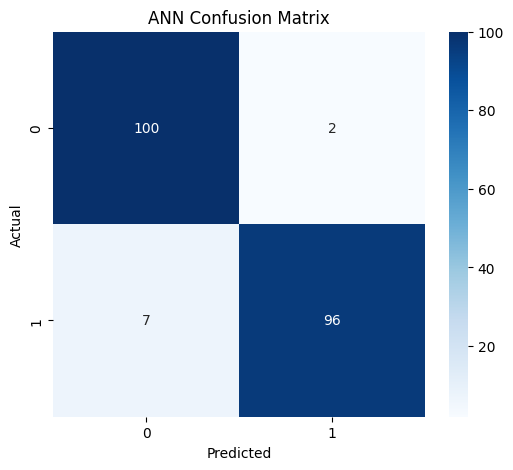

In [98]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("ANN Confusion Matrix")
plt.show()

In [99]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.98      0.93      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



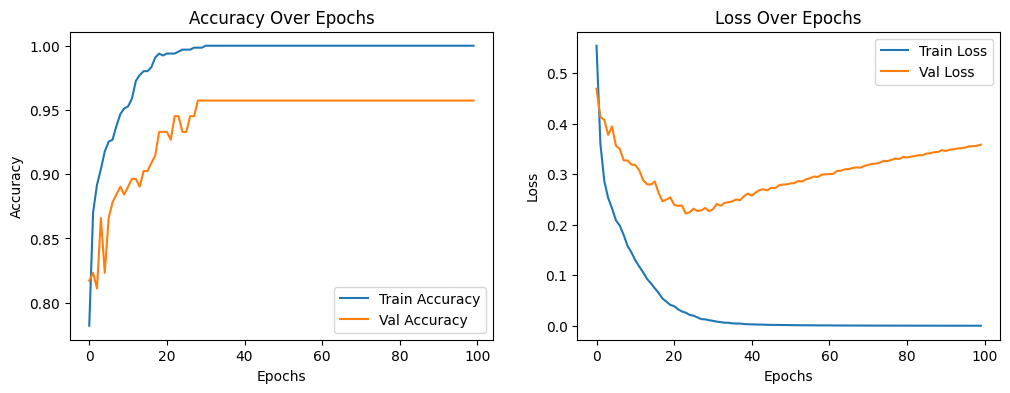

In [100]:
# Plot training history
# ==========================
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()